# Compare context probability in Facebook data
We're interested in comparing the probability of context use across Facebook groups (similar to [this](compare_descriptors_across_FB_groups.ipynb)) with the following hypothesis:

- $H_{a}$: a location mentioned in a Facebook group that contains the location is less likely to require context information than when it is mentioned in a group that does not contain the location.

In [5]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

## Load data

In [172]:
from ast import literal_eval
group_data = pd.read_csv('../../data/facebook-maria/combined_group_data_es_tagged_valid_anchor_group_contain.tsv', sep='\t', index_col=False, converters={'subtree' : literal_eval, 'tree' : literal_eval})

In [173]:
display(group_data.head())

,group_id,status_author_id,status_message,status_id,status_published,LOC_GN,LOC_OSM,NE,parse,subtree,tree,NE_fixed,max_population,max_alternate_names,valid_loc,data_name,anchor,location_name,group_name,group_contains_NE
0,117445378946554,622986069863,Si alguien sabe de mi Tio Hector L Cortes en U...,117445378946554_117470438944048,2017-09-21 15:34:48,1,1,utuado,"[[['Si', 'ADP', 2, 'mark', 0], ['alguien', 'PR...",[],"[[Utuado, PROPN, 9, pobj, 10]]",utuado,33149.0,7.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
1,117445378946554,125171901532348,Estoy buscando a mi suegro Roberto Hernandez c...,117445378946554_118134852210940,2017-09-24 09:21:53,0,1,ensanche,"[[['Estoy', 'VERB', 1, 'aux', 0], ['buscando',...","[[92, PROPN, 12, appos, 13]]","[[Ensanche, PROPN, 10, appos, 12]]",ensanche,0.0,0.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
2,117445378946554,137510220308612,🚨¡¡ATENCIÓN!!🚨 Si eres de Utuado y vas para la...,117445378946554_117738858917206,2017-09-22 17:52:54,1,1,utuado,"[[['🚨', 'PUNCT', 3, 'p', 0], ['¡', 'PUNCT', 3,...",[],"[[Utuado, PROPN, 4, pobj, 5]]",utuado,33149.0,7.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
3,117445378946554,140996653314841,Necesitamos informacion de mi papa y hermana I...,117445378946554_120498565307902,2017-09-28 08:29:05,1,1,utuado,"[[['Necesitamos', 'VERB', 0, 'root', 0], ['inf...",[],"[[Utuado, PROPN, 6, pobj, 7]]",utuado,33149.0,7.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
4,117445378946554,141618616585006,Si alguien sabe de mis padres Judith y Héctor ...,117445378946554_117669132257512,2017-09-22 11:27:04,1,1,caguana,"[[['Si', 'ADP', 2, 'mark', 0], ['alguien', 'PR...","[[y, CONJ, 32, cc, 33], [La, PROPN, 35, det, 3...","[[Caguana, PROPN, 31, pobj, 32]]",caguana,0.0,0.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True


In [174]:
group_data[group_data.loc[:, 'NE'].apply(lambda x: 'barrio' in x)]

,group_id,status_author_id,status_message,status_id,status_published,LOC_GN,LOC_OSM,NE,parse,subtree,tree,NE_fixed,max_population,max_alternate_names,valid_loc,data_name,anchor,location_name,group_name,group_contains_NE
3573,119087272129297,290638904774905,Vivo En phl tengo fam en quebradillas barrio S...,119087272129297_119267392111285,2017-09-21 15:44:21,1,0,quebradillas barrio,"[[['Vivo', 'VERB', 0, 'root', 0], ['En', 'ADP'...","[[San, PROPN, 9, amod, 8], [Antonio, PROPN, 7,...","[[quebradillas, ADJ, 7, amod, 6], [barrio, NOU...",quebradillas barrio,0.0,1.0,1,maria_fb,1,['Quebradillas'],Quebradillas#Huracan#Maria,True
3768,119087272129297,1873743159605849,Si alguien sabe algo o a visto estas personas ...,119087272129297_119882988716392,2017-09-22 18:26:37,1,0,quebradillas barrio,"[[['Si', 'ADP', 2, 'mark', 0], ['alguien', 'PR...",[],"[[Quebradillas, PROPN, 21, pobj, 23], [Barrio,...",quebradillas barrio,0.0,1.0,1,maria_fb,0,['Quebradillas'],Quebradillas#Huracan#Maria,True
4083,119087272129297,10155662932075535,Si alguien sabe algo de Quebradillas Barrio Ca...,119087272129297_119207685450589,2017-09-21 10:50:58,1,0,quebradillas barrio,"[[['Si', 'ADP', 2, 'mark', 0], ['alguien', 'PR...","[[Cacao, PROPN, 6, amod, 7], [Sector, PROPN, 5...","[[Quebradillas, PROPN, 4, pobj, 5], [Barrio, P...",quebradillas barrio,0.0,1.0,1,maria_fb,0,['Quebradillas'],Quebradillas#Huracan#Maria,True
4135,119087272129297,10156674112797388,Por Favor Alguien sabe de Quebradillas Barrio ...,119087272129297_119449402093084,2017-09-21 22:16:39,1,0,quebradillas barrio,"[[['Por', 'ADP', 3, 'prep', 0], ['Favor', 'PRO...","[[Terranova, PROPN, 5, nn, 7]]","[[Quebradillas, PROPN, 4, pobj, 5], [Barrio, P...",quebradillas barrio,0.0,1.0,1,maria_fb,0,['Quebradillas'],Quebradillas#Huracan#Maria,True
4227,119087272129297,10159487885645297,Hoy al fin recibimos contacto de mis padres! M...,119087272129297_120663781971646,2017-09-24 16:44:46,1,0,quebradillas barrio,"[[['Hoy', 'ADV', 3, 'advmod', 0], ['al', 'ADP'...","[[San, PROPN, 7, amod, 6], [José, PROPN, 4, nn...","[[Quebradillas, PROPN, 3, pobj, 4], [Barrio, P...",quebradillas barrio,0.0,1.0,1,maria_fb,0,['Quebradillas'],Quebradillas#Huracan#Maria,True
6318,142680509678003,10213801020570149,"Algun contacto en el Bo. Belgica, Ponce: calle...",142680509678003_143830686229652,2017-09-25 11:57:46,0,1,barrio belgica,"[[['Algun', 'VERB', 0, 'root', 0], ['contacto'...","[[el, DET, 4, det, 3]]","[[Barrio, PROPN, 2, pobj, 4], [Belgica, PROPN,...",barrio belgica,0.0,0.0,1,maria_fb,0,['Ponce'],Huracán María: Información de Ponce y Areas Ad...,True
7513,127217134598253,686614794863014,Alguien sabe barranquitas Helechal Barrio no s...,127217134598253_128561457797154,2017-09-23 19:03:54,1,0,helechal barrio,"[[['Alguien', 'PRON', 1, 'nsubj', 0], ['sabe',...","[[no, ADV, 7, neg, 5], [se, PRON, 7, prt, 6], ...","[[Helechal, PROPN, 2, amod, 3], [Barrio, PROPN...",helechal barrio,0.0,1.0,1,maria_fb,0,['Barranquitas'],Barranquitas Huracan Maria,True
9685,891721064308258,10210825318770068,Alguien tiene información del Barrio Santa Ana...,891721064308258_896099567203741,2017-09-27 20:26:55,0,1,barrio santa ana,"[[['Alguien', 'PRON', 1, 'nsubj', 0], ['tiene'...","[[en, ADP, 4, prep, 7], [Coamo, PROPN, 7, pobj...","[[Barrio, PROPN, 3, pobj, 4], [Santa, PROPN, 6...",barrio santa ana,0.0,0.0,1,maria_fb,1,['Coamo'],Huracan Maria Coamo,False
10483,1972572999632293,1825294090833230,Alguna informacion del Barrio Pueblo Nuevo nes...,1972572999632293_1972714706284789,2017-09-21 18:34:12,0,1,barrio pueblo,"[[['Alguna', 'DET', 1, 'det', 0], ['informacio...","[[Nuevo, PROPN, 4, amod, 5], [nesecito, ADJ, 4...","[[Barrio, PROPN, 2, pobj, 3], [Pueblo, PROPN, ...",barrio pueblo,0.0,0.0,1,maria_fb,0,['Vega Baja'],Noticias!! Huracan Maria Vega Baja,False
10500,1972572999632293,10101010970099959,Mi gente estoy buscando information de me madr...,1972572999632293_1973219026234357,2017-09-22 19:11:13,0,1,barrio pueblo,"[[['Mi', 'PRON', 1, 'det', 0], ['gente'

In [175]:
print('%d/%d NE mentions with context'%(group_data.loc[:, 'anchor'].sum(), group_data.shape[0]))
print('%d/%d local NE mentions'%(group_data.loc[:, 'group_contains_NE'].sum(), group_data.shape[0]))

765/18432 NE mentions with context
10131/18432 local NE mentions


OK! Not great coverage with context but maybe we'll see something useful.

### Test local vs. non-local mentions
Now the test is simple: do local locations attract context more than non-local locations?

In [75]:
# overall proportion
from statsmodels.stats.proportion import proportions_ztest
local_var = 'group_contains_NE'
context_var = 'anchor'
group_data_local = group_data[group_data.loc[:, local_var]]
group_data_non_local = group_data[~group_data.loc[:, local_var]]
context_local = group_data_local.loc[:, context_var].sum()
context_non_local = group_data_non_local.loc[:, context_var].sum()
context_local_prob = context_local / group_data_local.shape[0]
context_non_local_prob = context_non_local / group_data_non_local.shape[0]
test_stat, p_val = proportions_ztest([context_local, context_non_local], [group_data_local.shape[0], group_data_non_local.shape[0]])
prob_diff = context_local_prob - context_non_local_prob
print('prob diff = %.3f, test stat = %.3f (p=%.3E)'%(prob_diff, test_stat, p_val))

prob diff = -0.019, test stat = -6.270 (p=3.603E-10)


local prob = 0.033 +/- 0.002
non-local prob = 0.052 +/- 0.002


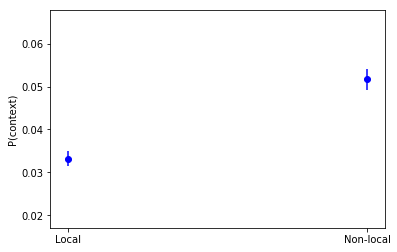

In [76]:
## plot probability
X = [0,1]
X_str = ['Local', 'Non-local']
probs = [context_local_prob, context_non_local_prob]
probs_err = [(context_local_prob*(1-context_local_prob) / group_data_local.shape[0])**.5, (context_non_local_prob*(1-context_non_local_prob) / group_data_non_local.shape[0])**.5]
print('local prob = %.3f +/- %.3f'%(probs[0], probs_err[0]))
print('non-local prob = %.3f +/- %.3f'%(probs[1], probs_err[1]))
plt.scatter(X, probs, color='b')
plt.errorbar(X, probs, yerr=probs_err, color='b', linestyle='none')
plt.xticks(X, X_str)
plt.ylabel('P(context)')
plt.show()

Let's restrict this to locations that have both local and non-local mentions, and then do a paired test.

In [77]:
local_var = 'group_contains_NE'
context_var = 'anchor'
NE_var = 'NE_fixed'
group_data_local = group_data[group_data.loc[:, local_var]]
group_data_non_local = group_data[~group_data.loc[:, local_var]]
shared_NEs = set(group_data_local.loc[:, NE_var].unique()) & set(group_data_non_local.loc[:, NE_var].unique())
print('%d/%d shared NEs'%(len(shared_NEs),group_data.loc[:, NE_var].nunique()))
group_data_local_shared_NEs = group_data_local[group_data_local.loc[:, NE_var].isin(shared_NEs)]
group_data_non_local_shared_NEs = group_data_non_local[group_data_non_local.loc[:, NE_var].isin(shared_NEs)]

135/821 shared NEs


In [78]:
# paired t-test
from scipy.stats import ttest_rel
local_var = 'group_contains_NE'
context_var = 'anchor'
context_local_prob = group_data_local_shared_NEs.groupby(NE_var).apply(lambda x: x.loc[:, context_var].mean()).sort_index()
context_non_local_prob = group_data_non_local_shared_NEs.groupby(NE_var).apply(lambda x: x.loc[:, context_var].mean()).sort_index()
context_local_non_local_prob_diff = (context_local_prob - context_non_local_prob).mean()
test_stat, p_val = ttest_rel(context_local_prob, context_non_local_prob)
print('paired diff = %.3f, test_stat=%.3f (p=%.3E)'%(context_local_non_local_prob_diff, test_stat, p_val))

paired diff = -0.008, test_stat=-0.487 (p=6.270E-01)


Not great! Maybe we should log-transform and use a nonparametric test to handle the skew.

In [79]:
from scipy.stats import wilcoxon
## log-transform
prob_smooth = 1e-2
context_local_prob_log = np.log(context_local_prob+prob_smooth)
context_non_local_prob_log = np.log(context_non_local_prob+prob_smooth)
context_local_non_local_prob_log_diff = (context_local_prob_log - context_non_local_prob_log)
# restrict to 
context_local_non_local_prob_log_diff_mean = (context_local_prob_log - context_non_local_prob_log).mean()
# similar results
# test_stat, p_val = ttest_rel(context_local_prob_log, context_non_local_prob_log)
test_stat, p_val = wilcoxon(context_local_prob_log, context_non_local_prob_log, zero_method='wilcox')
print('paired diff = %.3f, test_stat=%.3f (p=%.3E)'%(context_local_non_local_prob_log_diff_mean, test_stat, p_val))

paired diff = -0.049, test_stat=1184.000 (p=7.321E-01)


Maybe we should use an unpaired test to weight the more frequent NEs more heavily?

In [80]:
# unpaired test
local_var = 'group_contains_NE'
context_var = 'anchor'
context_local = group_data_local_shared_NEs.loc[:, context_var].sum()
context_non_local = group_data_non_local_shared_NEs.loc[:, context_var].sum()
context_local_prob = context_local / group_data_local_shared_NEs.shape[0]
context_non_local_prob = context_non_local / group_data_non_local_shared_NEs.shape[0]
test_stat, p_val = proportions_ztest([context_local, context_non_local], [group_data_local_shared_NEs.shape[0], group_data_non_local_shared_NEs.shape[0]])
prob_diff = context_local_prob - context_non_local_prob
print('prob diff = %.3f, test stat = %.3f (p=%.3E)'%(prob_diff, test_stat, p_val))

prob diff = -0.040, test stat = -9.400 (p=5.440E-21)


In [81]:
probs = [context_local_prob, context_non_local_prob]
probs_err = [(context_local_prob*(1-context_local_prob) / group_data_local.shape[0])**.5, (context_non_local_prob*(1-context_non_local_prob) / group_data_non_local.shape[0])**.5]
print('local prob = %.3f +/- %.3f'%(probs[0], probs_err[0]))
print('non-local prob = %.3f +/- %.3f'%(probs[1], probs_err[1]))

local prob = 0.032 +/- 0.002
non-local prob = 0.072 +/- 0.003


### Examples of local/non-local pairs
Let's get some examples of mentions of the same location that has context in the non-local group and no context in the local group.

In [29]:
local_var = 'group_contains_NE'
context_var = 'anchor'
NE_var = 'NE_fixed'
group_data_local = group_data[group_data.loc[:, local_var]]
group_data_non_local = group_data[~group_data.loc[:, local_var]]
shared_NEs = set(group_data_local.loc[:, NE_var].unique()) & set(group_data_non_local.loc[:, NE_var].unique())
print('%d shared NEs'%(len(local_non_local_NEs)))
group_data_local_shared_NEs = group_data_local[group_data_local.loc[:, NE_var].isin(shared_NEs)]
group_data_non_local_shared_NEs = group_data_non_local[group_data_non_local.loc[:, NE_var].isin(shared_NEs)]

113 shared NEs


In [35]:
top_k = 5
local_non_local_NE_counts = group_data[group_data.loc[:, NE_var].isin(shared_NEs)].loc[:, NE_var].value_counts()
txt_var = 'status_message'
group_var = 'group_name'
for i in range(top_k):
    NE_i = local_non_local_NE_counts.index[i]
    print('NE=%s'%(NE_i))
    group_data_local_i = group_data_local[(group_data_local.loc[:, NE_var]==NE_i) & 
                                          (~group_data_local.loc[:, context_var])]
    group_data_non_local_i = group_data_non_local[(group_data_non_local.loc[:, NE_var]==NE_i) & 
                                                  (group_data_non_local.loc[:, context_var])]
    if((group_data_local_i.shape[0] > 0) & (group_data_non_local_i.shape[0] > 0)):
        print('local+no-context group=%s, text=%s'%(group_data_local_i.loc[:, group_var].iloc[0], group_data_local_i.loc[:, txt_var].iloc[0]))
        print('non-local+context group=%s, text=%s'%(group_data_non_local_i.loc[:, group_var].iloc[0], group_data_non_local_i.loc[:, txt_var].iloc[0]))

NE=guayama
NE=coamo
NE=lajas
local+no-context group=Huracan Maria En Lajas, text=¿Saben si el Banco Popular en Lajas está abierto al público? ¿Si pueden hacerse transferencias de dinero?
non-local+context group=Guayama: Huracán María, text=Gente que Pueda coperar llevando Agua a Lajas Puerto Rico necesitan agua urgente!
NE=yabucoa
local+no-context group=Huracan Maria  Yabucoa, text=Se busca a alguien que pueda llevar a un familiar al aereopuerto de San Juan, desde Jaime C en Yabucoa la primera o segunda semana de Octubre. Favor de comunicarse con Yamil Solis por inbox con su tarifa. Gracias!!
non-local+context group=Corozal huracan Maria, text=Mi Gente.... Búsqueda de las siguientes personas:Searching for the following people:Luz Belen RodriguezEn Parceles Nuevas, Playita in Yabucoa, PR.Si alguien sabe algo, por favor diles que se comuniquen conmigo o dime cómo están haciendo.If someone knows something please tell them to communicate with me or let me know?!?!!?Por Favor AyudaPlease He

### Test local vs. non-local authors
Let's see if individual post authors modulate their use of context based on local vs. non-local groups. Ex. if author $a$ posts in a group where they are not considered a local (i.e. in a group where they have not made the majority of their posts), do they include context?

In [45]:
author_var = 'status_author_id'
group_var = 'group_name'
author_group_counts = group_data.groupby(author_var).apply(lambda x: x.loc[:, group_var].nunique()).sort_values(inplace=False, ascending=False)
multi_group_authors = author_group_counts[author_group_counts>1].index.tolist()
print('%d/%d authors with multiple groups'%(len(multi_group_authors), len(author_group_counts)))

175/4694 authors with multiple groups


In [46]:
group_data_multi_authors = group_data[group_data.loc[:, author_var].isin(multi_group_authors)]
print('%d/%d multi-group author data'%(group_data_multi_authors.shape[0], group_data.shape[0]))

3064/18432 multi-group author data


In [90]:
## assign "local" group based on max posts
## if author A posts more than 50% of their posts
## in group G, then they are "local" to that group
def add_author_local_data(data, group_var='group_name'):
    group_counts = data.loc[:, group_var].value_counts()
    group_pcts = group_counts / group_counts.sum()
    max_group_pct = 0.50
    if(group_pcts.max() > max_group_pct):
        local_group = group_pcts.index[np.where(group_pcts==group_pcts.max())[0]][0]
#         print(local_group)
#         print((data.loc[:, group_var]==local_group).astype(int))
#         print(data.shape[0])
        data = data.assign(**{
            'author_local' : (data.loc[:, group_var]==local_group).astype(int)
        })
    else:
        data = data.assign(**{
            'author_local' : 0
        })
    return data

In [91]:
group_data_local_authors = []
for author_i, data_i in group_data_multi_authors.groupby(author_var):
    data_i = add_author_local_data(data_i, group_var=group_var)
    group_data_local_authors.append(data_i)
group_data_local_authors = pd.concat(group_data_local_authors, axis=0)

In [93]:
author_local_var = 'author_local'
print('%d/%d posts by local authors'%(group_data_local_authors.loc[:, author_local_var].sum(), group_data_local_authors.shape[0]))

1327/3064 posts by local authors


Let's compare the likelihood of context use in local and non-local contexts.

In [98]:
from statsmodels.stats.proportion import proportions_ztest
context_var = 'anchor'
group_data_local_authors_0 = group_data_local_authors[group_data_local_authors.loc[:, author_local_var]==0]
group_data_local_authors_1 = group_data_local_authors[group_data_local_authors.loc[:, author_local_var]==1]
context_count_0 = group_data_local_authors_0.loc[:, context_var].sum()
context_count_1 = group_data_local_authors_1.loc[:, context_var].sum()
context_pcts = [context_count_0 / group_data_local_authors_0.shape[0], 
                context_count_1 / group_data_local_authors_1.shape[0], ]
context_errs = [(context_pcts[0]*(1-context_pcts[0]) / group_data_local_authors_0.shape[0])**.5, 
                (context_pcts[1]*(1-context_pcts[1]) / group_data_local_authors_1.shape[0])**.5]
context_pct_diff = context_pcts[0] - context_pcts[1]
test_stat, p_val = proportions_ztest([context_count_1, context_count_0], [group_data_local_authors_1.shape[0], group_data_local_authors_0.shape[0]])
print('P(context, author!=local) = %.3f +/- %.3f'%(context_pcts[0], context_errs[0]))
print('P(context, author=local) = %.3f +/- %.3f'%(context_pcts[1], context_errs[1]))
print('P(context) diff = %.3f, test_stat = %.3f (p=%.3E)'%(context_pct_diff, test_stat, p_val))

P(context, author!=local) = 0.139 +/- 0.008
P(context, author=local) = 0.010 +/- 0.003
P(context) diff = 0.129, test_stat = -12.827 (p=1.157E-37)


In [112]:
## same thing but with shared authors
shared_authors = set(group_data_local_authors_0.loc[:, author_var].unique()) & set(group_data_local_authors_1.loc[:, author_var].unique())
print('%d/%d shared authors'%(len(shared_authors), group_data_multi_authors.loc[:, author_var].nunique()))
group_data_local_authors_0_shared = group_data_local_authors_0[group_data_local_authors_0.loc[:, author_var].isin(shared_authors)]
group_data_local_authors_1_shared = group_data_local_authors_1[group_data_local_authors_1.loc[:, author_var].isin(shared_authors)]
context_count_0 = group_data_local_authors_0_shared.loc[:, context_var].sum()
context_count_1 = group_data_local_authors_1_shared.loc[:, context_var].sum()
context_pcts = [context_count_0 / group_data_local_authors_0_shared.shape[0],
                context_count_1 / group_data_local_authors_1_shared.shape[0], ]
# context_pcts = [group_data_local_authors_0_shared.groupby(NE_var).apply(lambda x: x.loc[:, context_var].mean()).mean(),
#                 group_data_local_authors_1_shared.groupby(NE_var).apply(lambda x: x.loc[:, context_var].mean()).mean()]
context_errs = [(context_pcts[0]*(1-context_pcts[0]) / group_data_local_authors_0_shared.shape[0])**.5, 
                (context_pcts[1]*(1-context_pcts[1]) / group_data_local_authors_1_shared.shape[0])**.5]
context_pct_diff = context_pcts[0] - context_pcts[1]
test_stat, p_val = proportions_ztest([context_count_1, context_count_0], [group_data_local_authors_1_shared.shape[0], group_data_local_authors_0_shared.shape[0]])
print('P(context, author!=local) = %.3f +/- %.3f'%(context_pcts[0], context_errs[0]))
print('P(context, author=local) = %.3f +/- %.3f'%(context_pcts[1], context_errs[1]))
print('P(context) diff = %.3f, test_stat = %.3f (p=%.3E)'%(context_pct_diff, test_stat, p_val))

92/175 shared authors
P(context, author!=local) = 0.004 +/- 0.003
P(context, author=local) = 0.010 +/- 0.003
P(context) diff = -0.006, test_stat = 1.367 (p=1.716E-01)


In [109]:
## same thing but per-author
shared_authors = set(group_data_local_authors_0.loc[:, author_var].unique()) & set(group_data_local_authors_1.loc[:, author_var].unique())
print('%d/%d shared authors'%(len(shared_authors), group_data_multi_authors.loc[:, author_var].nunique()))
group_data_local_authors_0_shared = group_data_local_authors_0[group_data_local_authors_0.loc[:, author_var].isin(shared_authors)]
group_data_local_authors_1_shared = group_data_local_authors_1[group_data_local_authors_1.loc[:, author_var].isin(shared_authors)]
context_pcts_per_author = [group_data_local_authors_0_shared.groupby(author_var).apply(lambda x: x.loc[:, context_var].mean()).sort_index(),
                           group_data_local_authors_1_shared.groupby(author_var).apply(lambda x: x.loc[:, context_var].mean()).sort_index()]
context_pct_per_author_diff = context_pcts_per_author[1] - context_pcts_per_author[0]
context_pct_per_author_diff_mean = context_pct_per_author_diff.mean()
test_stat, p_val = ttest_rel(context_pcts_per_author[0], context_pcts_per_author[1])
print('P(context) diff = %.3f, test stat = %.3f (p=%.3E)'%(context_pct_per_author_diff_mean, test_stat, p_val))

92/175 shared authors
P(context) diff = 0.014, test stat = -0.812 (p=4.191E-01)


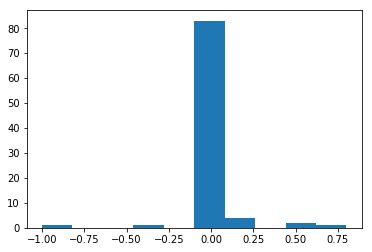

In [107]:
plt.hist(context_pct_per_author_diff)
plt.show()

Again, we find that the paired difference is insignificant, maybe because it's a non-representative sample.

### Test frequency versus context likelihood
Do more frequent NEs are less likely to require context? This would support the "old information by more mentions" hypothesis.

In [114]:
NE_counts = group_data.loc[:, NE_var].value_counts()
display(NE_counts.head(20))

guayama         1780
coamo           1197
lajas            818
yabucoa          816
barranquitas     814
quebradillas     798
cidra            756
naranjito        695
cayey            472
walmart          359
corozal          354
patillas         332
isabela          316
san juan         299
utuado           244
arroyo           240
guamani          218
centro           190
aguas buenas     185
mayaguez         184
Name: NE_fixed, dtype: int64

Surprise: the most frequent locations are also the most geographically important (municipalities).

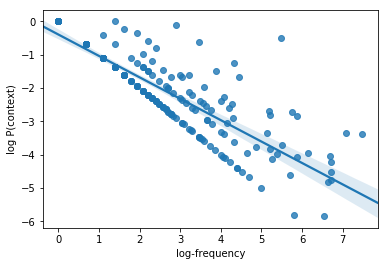

In [122]:
import seaborn as sns
context_var = 'anchor'
NE_context = group_data.groupby(NE_var).apply(lambda x: x.loc[:, context_var].mean()).sort_index()
NE_counts = group_data.loc[:, NE_var].value_counts().sort_index()
## log transform
context_var_smooth = 1e-3
# all context
# NE_context = np.log(NE_context + context_var_smooth)
# non-zero context
NE_context = np.log(NE_context[NE_context > 0.])
NE_counts = np.log(NE_counts.loc[NE_context.index])
# plt.scatter(NE_counts, NE_context)
sns.regplot(NE_counts, NE_context)
plt.xlabel('log-frequency')
plt.ylabel('log P(context)')
plt.show()

In [149]:
from scipy.stats import pearsonr
# compute correlation
correl, p_val = pearsonr(NE_counts, NE_context)
print('correl = %.3f (p=%.3E); N=%d'%(correl, p_val, len(NE_counts)))

correl = -0.840 (p=7.413E-55); N=201


Great! More frequent locations require less context.

TODO: add time component? I.e. more frequent in previous time period => less likely to require context.

### Compare group size versus context likelihood

Do larger groups require more context, because bigger audience?

In [137]:
group_var = 'group_name'
author_var = 'status_author_id'
# group_sizes = group_data.loc[:, group_var].value_counts()
# unique members
group_sizes = group_data.groupby(group_var).apply(lambda x: x.loc[:, author_var].nunique()).sort_values(ascending=False)
display(group_sizes.head())

group_name
Guayama: Huracán María                            906
Barranquitas Huracan Maria                        508
Huracan Maria Coamo                               409
Huracán Maria Vega Alta (Unidos por Vega Alta)    297
Quebradillas#Huracan#Maria                        247
dtype: int64

In [142]:
group_context_pcts = group_data.groupby(group_var).apply(lambda x: x.groupby(NE_var).apply(lambda y: y.loc[:, context_var].mean()).mean())
# group_context_pcts = group_data.groupby(group_var).apply(lambda x: x.loc[:, context_var].mean())

In [146]:
## log-transform
group_sizes_log = np.log(group_sizes)

# all context probs
# context_pct_smooth = 1e-3
# group_context_pcts_smooth = group_context_pcts + group_context_pcts[group_context_pcts > 0.].min()
# group_context_pcts_smooth = group_context_pcts_smooth / group_context_pcts_smooth.sum()
# group_context_pcts_log = np.log(group_context_pcts_smooth)

# nonzero context probs
group_context_pcts_log = np.log(group_context_pcts[group_context_pcts > 0.])
group_sizes_log = group_sizes_log.loc[group_context_pcts_log.index]

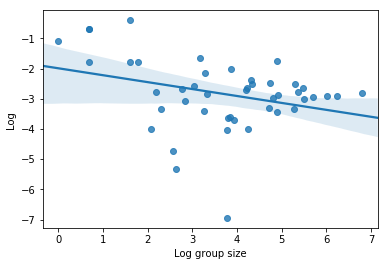

In [147]:
# plt.scatter(group_sizes_log, group_context_pcts_log)
sns.regplot(group_sizes_log, group_context_pcts_log)
plt.xlabel('Log group size')
plt.ylabel('Log P(context)')
plt.show()

In [150]:
from scipy.stats import pearsonr
# compute correlation
correl, p_val = pearsonr(group_sizes_log, group_context_pcts_log)
print('correl = %.3f (p=%.3E); N=%d'%(correl, p_val, len(group_sizes_log)))

correl = -0.316 (p=3.438E-02); N=45


Weak negative correlation but only when we consider the groups with nonzero $P(context)$.

## Compare post information with context use
What is the mediating effect of information structure (~ style) on context use?

Information structure (where "post" includes all text except for context where it appears):
- post length
- post topic (??)
- proportion of proper nouns/common nouns
- post entropy (??)

In [250]:
def get_text_with_no_context(data, id_var='status_id', txt_var='status_message', subtree_var='subtree', tree_var='tree', context_var='anchor'):
    """
    Replace context from text and return clean text.
    """
    no_context_txt_var = '%s_no_context'%(txt_var)
    data_no_context_txt = []
    for id_i, data_i in data.groupby(id_var):
        txt_i = data_i.loc[:, txt_var].iloc[0]
        # replace context in txt_i
        ## TODO: this is messy. we need the full context subtree + NE node in sequence
        txt_i_clean = txt_i
        for idx_j, NE_data_j in data_i.iterrows():
            if(NE_data_j.loc[context_var]==1):
    #             print('clean txt before: %s'%(txt_i_clean))
                tree_txt_j = ' '.join([token[0] for token in NE_data_j.loc[tree_var]])
                subtree_txt_j = ' '.join([token[0] for token in NE_data_j.loc[subtree_var]])
    #             print('tree txt %s'%(tree_txt_j))
    #             print('subtree txt %s'%(subtree_txt_j))
                txt_i_clean = txt_i_clean.replace(tree_txt_j, '')
                txt_i_clean = txt_i_clean.replace(subtree_txt_j, '')
    #             print('clean txt after: %s'%(txt_i_clean))
        data_i = data_i.assign(**{
            no_context_txt_var : data_i.apply(lambda x: txt_i_clean if x.loc[context_var]==1 else txt_i, axis=1)
        })
        data_no_context_txt.append(data_i)
    data_no_context_txt = pd.concat(data_no_context_txt, axis=0)
    return data_no_context_txt

In [251]:
context_var = 'anchor'
txt_var = 'status_message'
## get remove context str from message
subtree_var = 'subtree'
tree_var = 'tree'
id_var = 'status_id'
group_data_no_context_txt = get_text_with_no_context(group_data, id_var=id_var, txt_var=txt_var, subtree_var=subtree_var, tree_var=tree_var, context_var=context_var)

## compute length
len_txt_var = '%s_len'%(txt_var)
tokenizer = ToktokTokenizer()
group_data_no_context_txt = group_data_no_context_txt.assign(**{
    len_txt_var : group_data_no_context_txt.loc[:, no_context_txt_var].apply(lambda x: len(tokenizer.tokenize(x)))
})

In [185]:
## sanity check: is the clean text shorter than original text?
print(np.mean(group_data_no_context_txt.loc[:, len_txt_var]))
print(np.mean(group_data_no_context_txt.loc[:, txt_var].apply(lambda x: len(tokenizer.tokenize(x)))))

44.70648871527778
44.80908203125


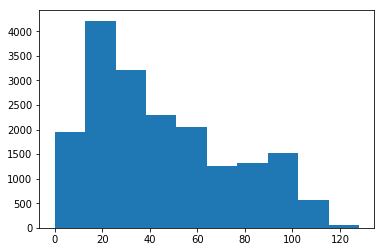

In [189]:
# distribution of clean text
plt.hist(group_data_no_context_txt.loc[:, len_txt_var], bins=10)
plt.show()

What is the correlation between post length and context use?

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


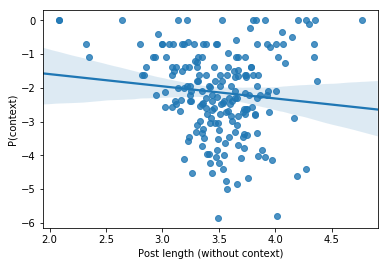

In [205]:
NE_var = 'NE_fixed'
context_var = 'anchor'
NE_context_use = group_data_no_context_txt.groupby(NE_var).apply(lambda x: np.log(x.loc[:, context_var].mean()))
NE_context_len = group_data_no_context_txt.groupby(NE_var).apply(lambda x: np.log(x.loc[:, len_txt_var]+1).mean())
NE_context_use = NE_context_use[NE_context_use > NE_context_use.min()]
NE_context_len = NE_context_len.loc[NE_context_use.index]
sns.regplot(NE_context_len, NE_context_use)
plt.xlabel('Post length (without context)')
plt.ylabel('P(context)')
plt.show()

In [206]:
from scipy.stats import pearsonr
correl, p_val = pearsonr(NE_context_len, NE_context_use)
print('R2=%.3f (p=%.3E)'%(correl, p_val))

R2=-0.111 (p=1.166E-01)


Let's test a few more aspects of information use:

- ratio of proper nouns to all words
- ratio of proper nouns to regular nouns (concrete vs. indefinite information)

We need to load the raw tagged data, collect the proper nouns, collect the regular nouns.

In [210]:
from ast import literal_eval
tagged_group_data = pd.read_csv('../../data/facebook-maria/combined_group_data_es_tagged.tsv', sep='\t', index_col=False, converters={'status_message_tags' : literal_eval, 'status_message_tags_ne' : literal_eval})
display(tagged_group_data.head())

,group_id,status_author_id,status_message,status_lang,status_id,status_published,status_message_clean,status_message_tags,status_message_tags_ne,status_message_ne_tagged_stemmed
0,351272391991842,10159623474155515,Estoy preocupada por mi tia vicky vazquez que ...,es,351272391991842_362333787552369,2017-10-19 18:25:23,Estoy preocupada por mi tia vicky vazquez que ...,"[(Estoy, O), (preocupada, O), (por, O), (mi, O...","[(asma, CAUSE_OF_DEATH), (Dorado, ORGANIZATION)]",estoy preocup por mi tia vicky vazquez que des...
1,351272391991842,10155877836122783,Para alguien que lo necesite... Dale Share..A ...,es,351272391991842_361695457616202,2017-10-18 06:47:34,Para alguien que lo necesite... Dale Share..A ...,"[(Para, O), (alguien, O), (que, O), (lo, O), (...","[(Share, MISC), (general, TITLE), (Hipnoterapi...",par algui que lo necesit... da le share.<ne.mi...
2,351272391991842,1716175958400853,En apoyo al alcalde Carlos Lopez y al municipi...,es,351272391991842_361453717640376,2017-10-17 17:38:08,En apoyo al alcalde Carlos Lopez y al municipi...,"[(En, O), (apoyo, O), (a, O), (el, O), (alcald...","[(alcalde, TITLE), (Carlos Lopez, PERSON), (Do...",en apoy a el alcalde.<ne.title> carlos_lopez.<...
3,351272391991842,141039043205101,Pueblo de Puerto Rico no se monten en las gran...,es,351272391991842_358929311226150,2017-10-11 14:14:22,Pueblo de Puerto Rico no se monten en las gran...,"[(Pueblo, O), (de, O), (Puerto, COUNTRY), (Ric...","[(Puerto Rico, COUNTRY), (America, MISC), (Pue...",puebl de puerto_rico.<ne.country> no se mont e...
4,351272391991842,141039043205101,PUEBLO DE PUERTO RICO no esperan ninguna ayuda...,es,351272391991842_358942134558201,2017-10-11 14:37:12,PUEBLO DE PUERTO RICO no esperan ninguna ayuda...,"[(PUEBLO, O), (DE, O), (PUERTO, O), (RICO, O),...","[(Estados Unidos, COUNTRY), (Puerto Rico, COUN...",puebl de puert ric no esper ningun ayud federa...


In [220]:
def compute_NE_ratio(data):
    NE_count = len(data.loc['status_message_tags_ne'])
    word_count = len(data.loc['status_message_tags'])
    if(word_count == 0):
        return 0
    else:
        return NE_count / word_count

In [226]:
id_var = 'status_id'
NE_ratio_var = 'NE_ratio'
NE_ratio_per_id = tagged_group_data.groupby(id_var).apply(lambda x: compute_NE_ratio(x.iloc[0, :])).reset_index().rename(columns={0 : NE_ratio_var})

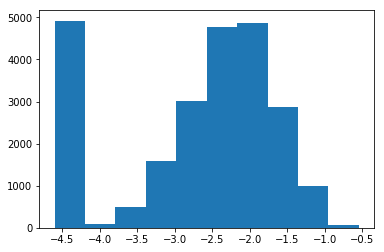

In [227]:
plt.hist(np.log(NE_ratio_per_id.loc[:, NE_ratio_var]+1e-2))
plt.show()

Roughly normal distribution of log-ratio, apart from the statuses without any NEs.

Let's rejoin this with the original data and compare NE ratio to context use.

In [228]:
group_data_NE_ratio = pd.merge(group_data, NE_ratio_per_id, on=id_var)

In [244]:
context_var = 'anchor'
NE_ratio_means = group_data_NE_ratio.groupby(NE_var).apply(lambda x: x.loc[:, NE_ratio_var].mean())
NE_context_means = group_data_NE_ratio.groupby(NE_var).apply(lambda x: x.loc[:, context_var].mean())
# restrict to nonzero NE contexts
NE_context_means = NE_context_means[NE_context_means > 0.]
NE_ratio_means = NE_ratio_means.loc[NE_context_means.index]
# log-transform
NE_context_means = np.log(NE_context_means)
NE_ratio_means = np.log(NE_ratio_means)

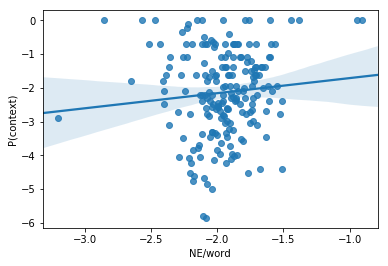

In [246]:
sns.regplot(NE_ratio_means, NE_context_means)
plt.xlabel('NE/word')
plt.ylabel('P(context)')
plt.show()

In [247]:
from scipy.stats import pearsonr
correl, p_val = pearsonr(NE_ratio_means, NE_context_means)
print('R2=%.3f (p=%.3E)'%(correl, p_val))

R2=0.094 (p=1.852E-01)


Weak positive correlation: more information => more likelihood of context. This seems to contradict the prior result but it may be the case that longer statuses are less likely to have more NEs (more generic nouns used in explanation, rather than NEs).

### Test information difference with topics
Maybe some (non-context) topics are more information-heavy than others.

In [399]:
## TODO: regenerate text with NEs preserved
## we can't really do that because of context-free text...unless we (1) remove context from tree (2) rebuild sentence from remaining tree (3) match NEs on new sentence

In [252]:
context_var = 'anchor'
txt_var = 'status_message'
## get remove context str from message
subtree_var = 'subtree'
tree_var = 'tree'
id_var = 'status_id'
group_data_no_context_txt = get_text_with_no_context(group_data, id_var=id_var, txt_var=txt_var, subtree_var=subtree_var, tree_var=tree_var, context_var=context_var)

In [386]:
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from stop_words import get_stop_words
from unidecode import unidecode
TKNZR = ToktokTokenizer()
no_context_txt_var = '%s_no_context'%(txt_var)
group_data_no_context_txt_dedup = group_data_no_context_txt.drop_duplicates(id_var, inplace=False)
# clean text
no_context_txt = group_data_no_context_txt_dedup.loc[:, no_context_txt_var].apply(lambda x: unidecode(x))
stop_words = get_stop_words('es') + [',', '.', ';', ':', '...', '!', '(', ')', '"', "'"]
cv = TfidfVectorizer(max_features=2000, max_df=0.8, lowercase=True, tokenizer=TKNZR.tokenize, stop_words=stop_words)
# cv = CountVectorizer(max_features=5000, min_df=0.05, max_df=0.8, lowercase=True, tokenizer=TKNZR.tokenize)
no_context_dtm = cv.fit_transform(no_context_txt)
# gensim implementation...not super intuitive
# from gensim import corpora, models
# txt_dict = corpora.Dictionary(no_context_txt_tokens)
# txt_corpus = [txt_dict.doc2bow(x) for x in no_context_txt_tokens]

Test for optimal number of topics.

In [314]:
np.random.seed(123)
from sklearn.decomposition import LatentDirichletAllocation
N_topics_list = [5, 10, 20]
train_pct = 0.9
N_train = int(train_pct*(no_context_dtm.shape[0]))
dtm_train = no_context_dtm[:N_train,]
dtm_test = no_context_dtm[N_train:,]
for N_topics in N_topics_list:
    lda_model = LatentDirichletAllocation(n_topics=N_topics, max_iter=20, learning_method='batch')
    lda_model.fit(dtm_train)
    perplexity = lda_model.perplexity(dtm_test)
    print('N=%d, perplexity=%.3f'%(N_topics, perplexity))

N=5, perplexity=41698.957
N=10, perplexity=495623.829
N=20, perplexity=23057373.269


In [388]:
np.random.seed(123)
N_topics_opt = 5
lda_model = LatentDirichletAllocation(n_topics=N_topics_opt, max_iter=20, learning_method='batch')
lda_model = lda_model.fit(no_context_dtm)

In [273]:
def print_topics(lda_model, vectorizer, top_k=10):
    vectorizer_feat_names = vectorizer.get_feature_names()
    for idx, topic in enumerate(lda_model.components_):
        print('*~*~*~*~*topic %d*~*~*~*~*'%(idx))
        top_feats = [(vectorizer_feat_names[i], topic[i]) for i in topic.argsort()[:-top_k-1:-1]]
        print('\n'.join(['%s (%.3f)'%(feat_name, topic_score) for feat_name, topic_score in top_feats]))

In [389]:
topic_feats_k = 20
print_topics(lda_model, cv, top_k=topic_feats_k)

*~*~*~*~*topic 0*~*~*~*~*
si (151.966)
favor (147.130)
saber (134.595)
alguien (132.283)
informacion (94.097)
familia (91.724)
sabe (85.672)
gracias (84.130)
vive (77.771)
buscando (71.656)
calle (65.916)
rivera (57.424)
viven (56.433)
barrio (52.131)
mama (48.352)
papa (47.669)
dios (46.187)
llama (46.031)
rodriguez (45.845)
hermana (45.028)
*~*~*~*~*topic 1*~*~*~*~*
estan (28.791)
dios (27.475)
bien (22.844)
coamo (21.242)
bien. (19.619)
quebradillas (18.184)
familia (17.034)
cerro (16.630)
gracias (16.395)
guajataca (15.196)
ciudad (14.948)
familiares (14.489)
pueblo (13.905)
hablar (13.480)
espero (13.294)
senal (13.167)
familias (12.097)
hoy (11.984)
patillas (11.254)
q (11.193)
*~*~*~*~*topic 2*~*~*~*~*
senal (18.768)
utuado (18.459)
gente (17.440)
estan (15.140)
zello (14.878)
corozal (14.809)
fotos (14.748)
pueblo (14.656)
mas (14.419)
bajura (14.317)
bayamon (14.063)
cidra (13.711)
centro (13.694)
alcalde (13.309)
toa (13.147)
ayuda (12.705)
barranquitas (12.689)
dorado (12.01

Topic differences:
- 0: requests, personal affect
- 1: questions, information about family
- 2: concrete information about locations
- 3: concrete information about aid (food, water, help)
- 4: information about family with geography (neighborhood, river, street)

Let's do a soft topic assignment over all posts, Z-norm within-topic, then try to predict context use.

In [390]:
doc_topics = lda_model.transform(no_context_dtm)

In [391]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(doc_topics)
doc_topics_norm = scaler.fit_transform(doc_topics)
print(doc_topics_norm)

[[0.31659253 0.06389464 0.06496125 0.33823815 0.21631342]
 [0.03241371 0.26292099 0.03409434 0.6373841  0.03318686]
 [0.77413872 0.05593069 0.05520855 0.05565793 0.05906411]
 ...
 [0.0583228  0.37599316 0.0574175  0.4484913  0.05977523]
 [0.046986   0.04722659 0.04775238 0.81109457 0.04694046]
 [0.03197416 0.03110256 0.17625272 0.65422256 0.10644801]]
[[-0.03650057 -0.32013408 -0.32792341  0.44870426  0.00735839]
 [-0.93244956  0.87000546 -0.5036076   1.55973406 -0.69677593]
 [ 1.40603501 -0.36775701 -0.38343255 -0.60080037 -0.59727608]
 ...
 [-0.85076431  1.54615543 -0.37085993  0.85818511 -0.59454178]
 [-0.88650657 -0.41980584 -0.42587059  2.20489579 -0.64389238]
 [-0.93383538 -0.51622449  0.30551051  1.62227222 -0.41508174]]


In [392]:
from statsmodels.discrete.discrete_model import Logit
dep_var = 'anchor'
X = np.hstack([doc_topics_norm, np.repeat(1, doc_topics_norm.shape[0]).reshape(-1,1)])
# X = doc_topics_norm.copy()
Y = group_data_no_context_txt_dedup.loc[:, dep_var].values
logit_model = Logit(endog=Y, exog=X)
logit_model_res = logit_model.fit(method='bfgs')
print(logit_model_res.summary())

Optimization terminated successfully.
         Current function value: 0.206542
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6768
Model:                          Logit   Df Residuals:                     6763
Method:                           MLE   Df Model:                            4
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                 0.01014
Time:                        17:38:37   Log-Likelihood:                -1397.9
converged:                       True   LL-Null:                       -1412.2
Covariance Type:            nonrobust   LLR p-value:                 9.289e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1662   8.36e+05   1.9

Let's try hard-labelling instead.

In [393]:
doc_topics_norm_hard = np.apply_along_axis(lambda x: (x == x.max()).astype(int), 1, doc_topics_norm)
print(doc_topics_norm_hard)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 ...
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [394]:
from statsmodels.discrete.discrete_model import Logit
dep_var = 'anchor'
X = np.hstack([doc_topics_norm_hard, np.repeat(1, doc_topics_norm.shape[0]).reshape(-1,1)])
# X = doc_topics_norm_hard.copy()
Y = group_data_no_context_txt_dedup.loc[:, dep_var].values
logit_model = Logit(endog=Y, exog=X)
logit_model_res = logit_model.fit(method='bfgs')
print(logit_model_res.summary())

         Current function value: 0.206633
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6768
Model:                          Logit   Df Residuals:                     6763
Method:                           MLE   Df Model:                            4
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                0.009700
Time:                        17:38:37   Log-Likelihood:                -1398.5
converged:                      False   LL-Null:                       -1412.2
Covariance Type:            nonrobust   LLR p-value:                 1.653e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0991   3.49e+05  -2.84e-07      1.000   -6.85e+05    6.85e+

/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Let's do something simpler: get P(context) for all entities in each topic.

In [395]:
topic_var = 'doc_topic'
group_data_topic = group_data_no_context_txt_dedup.assign(**{
    topic_var : np.argmax(doc_topics_norm_hard, axis=1)
})
id_var = 'status_id'
group_data_topic = pd.merge(group_data, group_data_topic.loc[:, [id_var, topic_var]], on=id_var)

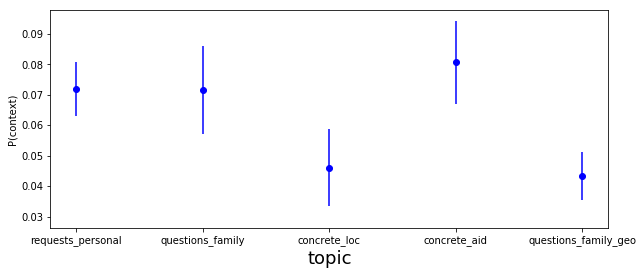

In [398]:
# get topic labels through manual inspection above
topic_labels = {
    0 : 'requests_personal',
    1 : 'questions_family',
    2 : 'concrete_loc',
    3 : 'concrete_aid',
    4 : 'questions_family_geo',
}
context_var = 'anchor'
NE_var = 'NE_fixed'
group_data_topic_context_means = group_data_topic.groupby(topic_var).apply(lambda x: x.groupby(NE_var).apply(lambda y: y.loc[:, context_var].mean()).mean())
group_data_topic_context_errs = group_data_topic.groupby(topic_var).apply(lambda x: x.groupby(NE_var).apply(lambda y: y.loc[:, context_var].mean()).std() / x.loc[:, NE_var].nunique()**.5)
X = range(group_data_topic.loc[:, topic_var].nunique())
X_ticks = [topic_labels[x] for x in X]
plt.figure(figsize=(10, 4))
plt.scatter(X, group_data_topic_context_means, color='b')
plt.errorbar(X, group_data_topic_context_means, group_data_topic_context_errs, color='b', linestyle='none')
plt.xlabel('topic', fontsize=18)
plt.ylabel('P(context)')
plt.xticks(X, X_ticks)
plt.show()

Generally, not much difference in context use except for:
- `concrete_loc` vs. others
    - Focus more on known locations, i.e. not requiring context?
- `questions_family_geo` vs. others
    - Focus more on known locations, i.e. not requiring context? Or maybe context implied through geography features

### Old code

## Load data

In [53]:
from ast import literal_eval
# Facebook data
list_cols = ['status_message_tags', 'status_message_tags_ne']
group_data = pd.read_csv('../../data/facebook-maria/combined_group_data_es_tagged.tsv', sep='\t', index_col=False, converters={l : literal_eval for l in list_cols})
# remove blanks
tags_col = 'status_message_tags'
group_data = group_data[group_data.loc[:, tags_col].apply(len) > 0.]
# fix list columns
# for c in list_cols:
#     group_data.loc[:, c] = group_data.loc[:, c].apply(literal_eval)
display(group_data.head())
## we need to add sentence index for all NEs to constrain
## what counts as "anchor" (same sentence)



,group_id,status_author_id,status_message,status_lang,status_id,status_published,status_message_clean,status_message_tags,status_message_tags_ne,status_message_ne_tagged_stemmed
0,351272391991842,10159623474155515,Estoy preocupada por mi tia vicky vazquez que ...,es,351272391991842_362333787552369,2017-10-19 18:25:23,Estoy preocupada por mi tia vicky vazquez que ...,"[(Estoy, O), (preocupada, O), (por, O), (mi, O...","[(asma, CAUSE_OF_DEATH), (Dorado, ORGANIZATION)]",estoy preocup por mi tia vicky vazquez que des...
1,351272391991842,10155877836122783,Para alguien que lo necesite... Dale Share..A ...,es,351272391991842_361695457616202,2017-10-18 06:47:34,Para alguien que lo necesite... Dale Share..A ...,"[(Para, O), (alguien, O), (que, O), (lo, O), (...","[(Share, MISC), (general, TITLE), (Hipnoterapi...",par algui que lo necesit... da le share.<ne.mi...
2,351272391991842,1716175958400853,En apoyo al alcalde Carlos Lopez y al municipi...,es,351272391991842_361453717640376,2017-10-17 17:38:08,En apoyo al alcalde Carlos Lopez y al municipi...,"[(En, O), (apoyo, O), (a, O), (el, O), (alcald...","[(alcalde, TITLE), (Carlos Lopez, PERSON), (Do...",en apoy a el alcalde.<ne.title> carlos_lopez.<...
3,351272391991842,141039043205101,Pueblo de Puerto Rico no se monten en las gran...,es,351272391991842_358929311226150,2017-10-11 14:14:22,Pueblo de Puerto Rico no se monten en las gran...,"[(Pueblo, O), (de, O), (Puerto, COUNTRY), (Ric...","[(Puerto Rico, COUNTRY), (America, MISC), (Pue...",puebl de puerto_rico.<ne.country> no se mont e...
4,351272391991842,141039043205101,PUEBLO DE PUERTO RICO no esperan ninguna ayuda...,es,351272391991842_358942134558201,2017-10-11 14:37:12,PUEBLO DE PUERTO RICO no esperan ninguna ayuda...,"[(PUEBLO, O), (DE, O), (PUERTO, O), (RICO, O),...","[(Estados Unidos, COUNTRY), (Puerto Rico, COUN...",puebl de puert ric no esper ningun ayud federa...


In [54]:
from functools import reduce
from nltk.tokenize import sent_tokenize
def add_idx(token_tags):
    tokens_str = ' '.join([x[0] for x in token_tags])
    try:
        tokens_idx = list(reduce(lambda a,b: a+b, [[i,]*len(x.split(' ')) for i, x in enumerate(sent_tokenize(tokens_str))]))
    except Exception as e:
        print('issue computing index for %s'%(token_tags))
    tokens_idx = [(token, tag, idx) for (token, tag), idx in zip(token_tags, tokens_idx)]
    return tokens_idx
token_col = 'status_message_tags'
group_data = group_data.assign(**{'token_tags_sent' : group_data.loc[:, token_col].apply(add_idx)})

## debugging
# test_tags = group_data.loc[:,'status_message_tags'].iloc[1]
# test_tags_idx = add_idx(test_tags)
# print(test_tags_idx)
# print(len(test_sent))
# test_sent_str = ' '.join([x[0] for x in test_sent])
# print(test_sent_str)
# print(sent_tokenize(test_sent_str))
# test_sent_idx = list(reduce(lambda a,b: a+b, [[i,]*len(x.split(' ')) for i, x in enumerate(sent_tokenize(test_sent_str))]))
# test_sent_idx = [(token, tag, idx) for (token, tag), idx in zip(test_sent, test_sent_idx)]
# print(test_sent_idx)

In [66]:
## extract NEs again with sentence idx
from importlib import reload
import data_helpers
reload(data_helpers)
from data_helpers import extract_NEs
token_tag_idx_col = 'token_tags_sent'
NE_idx_col = 'NE_tags_sent_idx'
group_data = group_data.assign(**{NE_idx_col : group_data.loc[:, token_tag_idx_col].apply(lambda x: extract_NEs(x))})
display(group_data.loc[:, 'NE_tags_sent_idx'].head())


0    [(asma, CAUSE_OF_DEATH, 0), (Dorado, ORGANIZAT...
1    [(Share, MISC, 0), (general, TITLE, 2), (Hipno...
2    [(alcalde, TITLE, 0), (Carlos Lopez, PERSON, 0...
3    [(Puerto Rico, COUNTRY, 0), (America, MISC, 0)...
4    [(Estados Unidos, COUNTRY, 0), (Puerto Rico, C...
Name: NE_tags_sent_idx, dtype: object

In [67]:
from unidecode import unidecode
# simpify NEs
LOC_tags = set(['LOCATION', 'CITY', 'ORGANIZATION'])
# NE_col = 'status_message_tags_ne'
NE_idx_col = 'NE_tags_sent_idx'
group_data = group_data.assign(**{'LOC_NEs' : group_data.loc[:, NE_idx_col].apply(lambda x: [(unidecode(y[0].lower()), y[2]) for y in x if y[1] in LOC_tags])})
display(group_data.head())

,group_id,status_author_id,status_message,status_lang,status_id,status_published,status_message_clean,status_message_tags,status_message_tags_ne,status_message_ne_tagged_stemmed,token_tags_sent,NE_tags_sent_idx,LOC_NEs
0,351272391991842,10159623474155515,Estoy preocupada por mi tia vicky vazquez que ...,es,351272391991842_362333787552369,2017-10-19 18:25:23,Estoy preocupada por mi tia vicky vazquez que ...,"[(Estoy, O), (preocupada, O), (por, O), (mi, O...","[(asma, CAUSE_OF_DEATH), (Dorado, ORGANIZATION)]",estoy preocup por mi tia vicky vazquez que des...,"[(Estoy, O, 0), (preocupada, O, 0), (por, O, 0...","[(asma, CAUSE_OF_DEATH, 0), (Dorado, ORGANIZAT...","[(dorado, 0)]"
1,351272391991842,10155877836122783,Para alguien que lo necesite... Dale Share..A ...,es,351272391991842_361695457616202,2017-10-18 06:47:34,Para alguien que lo necesite... Dale Share..A ...,"[(Para, O), (alguien, O), (que, O), (lo, O), (...","[(Share, MISC), (general, TITLE), (Hipnoterapi...",par algui que lo necesit... da le share.<ne.mi...,"[(Para, O, 0), (alguien, O, 0), (que, O, 0), (...","[(Share, MISC, 0), (general, TITLE, 2), (Hipno...","[(hipnoterapia clinica ericksoniana sistemica,..."
2,351272391991842,1716175958400853,En apoyo al alcalde Carlos Lopez y al municipi...,es,351272391991842_361453717640376,2017-10-17 17:38:08,En apoyo al alcalde Carlos Lopez y al municipi...,"[(En, O), (apoyo, O), (a, O), (el, O), (alcald...","[(alcalde, TITLE), (Carlos Lopez, PERSON), (Do...",en apoy a el alcalde.<ne.title> carlos_lopez.<...,"[(En, O, 0), (apoyo, O, 0), (a, O, 0), (el, O,...","[(alcalde, TITLE, 0), (Carlos Lopez, PERSON, 0...","[(dorado dorado, 0)]"
3,351272391991842,141039043205101,Pueblo de Puerto Rico no se monten en las gran...,es,351272391991842_358929311226150,2017-10-11 14:14:22,Pueblo de Puerto Rico no se monten en las gran...,"[(Pueblo, O), (de, O), (Puerto, COUNTRY), (Ric...","[(Puerto Rico, COUNTRY), (America, MISC), (Pue...",puebl de puerto_rico.<ne.country> no se mont e...,"[(Pueblo, O, 0), (de, O, 0), (Puerto, COUNTRY,...","[(Puerto Rico, COUNTRY, 0), (America, MISC, 0)...","[(shelter, 1)]"
4,351272391991842,141039043205101,PUEBLO DE PUERTO RICO no esperan ninguna ayuda...,es,351272391991842_358942134558201,2017-10-11 14:37:12,PUEBLO DE PUERTO RICO no esperan ninguna ayuda...,"[(PUEBLO, O), (DE, O), (PUERTO, O), (RICO, O),...","[(Estados Unidos, COUNTRY), (Puerto Rico, COUN...",puebl de puert ric no esper ningun ayud federa...,"[(PUEBLO, O, 0), (DE, O, 0), (PUERTO, O, 0), (...","[(Estados Unidos, COUNTRY, 0), (Puerto Rico, C...","[(nacion borincana, 3), (cordero, 5)]"


## Identify valid locations
We'll do this in the same way as with the Twitter data: 

- get gazetteer data for region of interest (PR)
- get all NEs tagged as LOCATION
- match NEs on gazetteer

In [4]:
import pickle
geo_dict = pickle.load(open('/hg190/corpora/GeoNames/allCountriesSimplified_lookup_US.pickle', 'rb'))

In [138]:
# restrict to PR locations
PR_country = 'PR'
geo_dict_PR = {k : v[v.loc[:, 'country']==PR_country] for k,v in geo_dict.items()}

In [139]:
geo_dict_PR = {k : v for k,v in geo_dict_PR.items() if v.shape[0] > 0}

In [140]:
display(geo_dict_PR['san juan'].head())

,geonames_ID,name,alternate_names,latitude,longitude,feature_class,feature_code,country,population,alternate_name_count
7744676,4568127,San Juan,"Caparra,Ciudad de Puerto Rico,Gorad San-Khuan,...",18.4663,-66.1057,P,PPLC,PR,418140,58
7744687,4568138,San Juan,,18.4509,-66.0917,A,ADM1,PR,431285,1


In [141]:
group_data = group_data.assign(**{'LOC_NEs_valid' : group_data.loc[:, 'LOC_NEs'].apply(lambda x: [y for y in x if y[0] in geo_dict_PR.keys()])})
print('%d/%d posts with 1+ valid LOC'%(group_data[group_data.loc[:, 'LOC_NEs_valid'].apply(len) > 0].shape[0], group_data.shape[0]))
print('%d/%d posts with >1 valid LOC'%(group_data[group_data.loc[:, 'LOC_NEs_valid'].apply(len) > 1].shape[0], group_data.shape[0]))
valid_NE_counts = pd.Series([y[0] for x in group_data.loc[:, 'LOC_NEs_valid'] for y in x ]).value_counts()
display(valid_NE_counts)

7237/23660 posts with 1+ valid LOC
1870/23660 posts with >1 valid LOC


guayama                987
pr                     937
coamo                  545
barranquitas           497
quebradillas           400
yabucoa                374
cidra                  367
san juan               367
corozal                289
cayey                  280
bayamon                215
utuado                 203
mayaguez               164
ponce                  161
lajas                  153
patillas               136
aguadilla              131
isabela                126
caguas                 122
san antonio            114
naranjito              114
humacao                 94
arecibo                 91
barrancas               89
arroyo                  88
llanos                  81
corazon                 80
el pueblo               79
iglesia                 79
carolina                78
                      ... 
casa blanca              1
sector lasalle           1
malecon                  1
villamar                 1
sosa                     1
columbus landing         1
r

## Identify anchor information
- Get all posts with multiple PR entities
- Compute max_pop for all entities
- Consider all entities that cooccur with higher max_pop => anchored

First we need to flatten the data.

In [142]:
group_data_flat = []
for idx, data_i in group_data.iterrows():
    for (NE_j, NE_j_idx) in data_i.loc['LOC_NEs_valid']:
        group_data_flat.append([data_i.loc['status_id'], NE_j, NE_j_idx])
group_data_flat = pd.DataFrame(group_data_flat, columns=['status_id', 'NE', 'NE_sent_idx'])
display(group_data_flat.head())

,status_id,NE,NE_sent_idx
0,351272391991842_362333787552369,dorado,0
1,351272391991842_361695457616202,caguas,6
2,351272391991842_361695457616202,turabo gardens,9
3,351272391991842_361695457616202,caguas,9
4,351272391991842_357797888005959,guayama,0


In [143]:
## add max_pop
importance_stat = 'population'
max_importance_stat = 'max_%s'%(importance_stat)
geo_dict_importance = pd.DataFrame(pd.Series({k : v.loc[:, importance_stat].max() for k,v in geo_dict_PR.items()})).reset_index().rename(columns={'index':'NE', 0 : max_importance_stat})
display(geo_dict_importance.head())
## join
if(max_importance_stat not in group_data_flat.columns):
    group_data_flat = pd.merge(group_data_flat, geo_dict_importance, on='NE')

,NE,max_population
0,roca negra,0
1,metropolis,0
2,paris,0
3,montecarlo,0
4,florida,12680


In [144]:
group_data_flat.head()

,status_id,NE,NE_sent_idx,max_population
0,351272391991842_362333787552369,dorado,0,38165
1,351272391991842_355121381606943,dorado,3,38165
2,351272391991842_351641228621625,dorado,2,38165
3,351272391991842_351456128640135,dorado,1,38165
4,239708553223790_245517462642899,dorado,0,38165


In [145]:
def find_anchors(data, importance_stat='max_population', group_col='status_id', context_col='NE_sent_idx', verbose=False):
    data_anchors = []
    anchor_col = '%s_anchor'%(importance_stat)
    anchor_NE_col = '%s_NE'%(anchor_col)
    NE_col = 'NE'
    for idx_i, data_i in data.groupby([group_col, context_col]):
        max_importance_i = data_i.loc[:, importance_stat].max()
        anchor_NE_i = data_i[data_i.loc[:, importance_stat]==max_importance_i].loc[:, NE_col].iloc[0]
        data_i = data_i.assign(**{anchor_col : (data_i.loc[:, importance_stat] < max_importance_i).astype(int)})
        data_i = data_i.assign(**{anchor_NE_col : anchor_NE_i})
        ## 
        if(verbose):
            display(data_i.head())
        data_anchors.append(data_i)
    data_anchors = pd.concat(data_anchors, axis=0)
    return data_anchors

In [ ]:
group_data_flat_i = [x for i,x in group_data_flat.groupby(['status_id', 'NE_sent_idx']) if x.shape[0] > 1 and 'pr' in x.loc[:, 'NE'].values][0]
display(group_data_flat_i.head())
display(find_anchors(group_data_flat_i, verbose=True))

,status_id,NE,NE_sent_idx,max_population
1473,1103661653103604_1107224206080682,pr,3,3916632
5993,1103661653103604_1107224206080682,manati,3,44113


In [149]:
# print(geo_dict)
print(geo_dict_importance[geo_dict_importance.loc[:, 'NE']=='buena vista'])

              NE  max_population
166  buena vista            2026


In [150]:
test_status_id = '117224992282301_117230168948450'
group_data_flat_i = group_data_flat[group_data_flat.loc[:, 'status_id']==test_status_id]
display(find_anchors(group_data_flat_i, verbose=True))

,status_id,NE,NE_sent_idx,max_population,max_population_anchor,max_population_anchor_NE
7734,117224992282301_117230168948450,humacao,2,58466,0,humacao
7813,117224992282301_117230168948450,buena vista,2,2026,1,humacao


,status_id,NE,NE_sent_idx,max_population,max_population_anchor,max_population_anchor_NE
7735,117224992282301_117230168948450,humacao,6,58466,0,humacao
7814,117224992282301_117230168948450,buena vista,6,2026,1,humacao


,status_id,NE,NE_sent_idx,max_population,max_population_anchor,max_population_anchor_NE
7734,117224992282301_117230168948450,humacao,2,58466,0,humacao
7813,117224992282301_117230168948450,buena vista,2,2026,1,humacao
7735,117224992282301_117230168948450,humacao,6,58466,0,humacao
7814,117224992282301_117230168948450,buena vista,6,2026,1,humacao


In [151]:
importance_stat = 'max_population'
group_col = 'status_id'
context_col = 'NE_sent_idx'
data_anchors = find_anchors(group_data_flat, importance_stat=importance_stat, group_col=group_col, context_col=context_col, verbose=False)
## special case: remove references to PR because it's non-local
non_local_NEs = ['pr', 'puerto rico']
data_anchors = data_anchors[~data_anchors.loc[:, 'NE'].isin(non_local_NEs)]
print('%d/%d NEs with anchor'%(data_anchors[data_anchors.loc[:, 'max_population_anchor']==1].shape[0], data_anchors.shape[0]))

2222/11078 NEs with anchor


In [152]:
## join with original status text for interpretable results
def match_sent(x, sent_idx_col='NE_sent_idx', status_col='status_message_tags_sent'):
    sent_idx = x.loc[sent_idx_col]
    sent_tokens = sent_tokenize(x.loc[status_col])
    if(sent_idx < len(sent_tokens)):
        sent = sent_tokens[sent_idx]
    else:
        print('error with idx %d sent %s'%(sent_idx, sent_tokens))
        sent = ''
    return sent
status_txt_col = 'status_message_clean'
status_txt_tag_col = 'status_message_tags_sent'
status_col = 'status_id'
if(status_txt_col in data_anchors.columns):
    data_anchors.drop(status_txt_col, axis=1, inplace=True)
## have to combine the tags => sent_tokenize
group_data = group_data.assign(**{status_txt_tag_col : group_data.loc[:, 'status_message_tags'].apply(lambda x: ' '.join([y[0] for y in x]))})
data_anchors = pd.merge(data_anchors, group_data.loc[:, [status_col, status_txt_tag_col]], on=status_col)
# add the containing sentences
data_anchors = data_anchors.assign(**{'NE_sent' : data_anchors.apply(lambda x: match_sent(x, status_col=status_txt_tag_col), axis=1)})


In [154]:
data_anchors_test = data_anchors[data_anchors.loc[:, 'max_population_anchor']==1]
display(data_anchors_test.head(50).loc[:, ['NE', 'max_population_anchor_NE', 'NE_sent', 'status_id']].apply(lambda x: '%s %s/%s: %s'%(x[3], x[0], x[1], x[2]), axis=1).values)
# display(group_data[group_data.loc[:, 'status_id'].isin(data_anchors_test.loc[:, 'status_id'].values)].loc[:, ['LOC_NEs', 'status_message_clean']].values)

array(['105121436871597_105159263534481 maunabo/caguas: Amigos , acabo de hablar con mi cuñada de Maunabo quien me llamó desde Caguas .',
       '1103661653103604_1107224206080682 manati/pr: 188 Manati , PR 00674',
       '117224992282301_117230168948450 buena vista/humacao: He lives in Buena Vista Humacao .',
       '117224992282301_117230168948450 buena vista/humacao: Vive en Buena Vista Humacao .',
       '117224992282301_118152648856202 humacao/pr: En éste grupo tienen algún voluntario ayudando en PR a visitar envejecientes de Humacao ?',
       '117224992282301_120760311928769 humacao/pr: Tengo que hacer el viaje a PR y quiero estar segura que pueda llegar de el aeropuerto a Humacao .',
       '117445378946554_117461222278303 la granja/san jose: Alguna info de la Granja , San Alberto , San Jose y el pueblito de Quitin .',
       '117445378946554_117462105611548 la granja/san jose: Alguna info de la Granja , San Alberto , San Jose y el pueblito de Quitin .',
       '117445378946554

## Update anchor = dependency child + NE
We need to update our definition of anchoring: anchor NE occurs in a subclause (`acl`, `prep`, `appos`) of the smaller NE. This will shrink the data but improve our precision.

In [174]:
from ast import literal_eval
# load the parses that we already generated
group_data_parsed_raw = pd.read_csv('../../data/facebook-maria/combined_group_data_es_tagged_parsed.txt', sep='\t', index_col=False, header=None, converters={1 : lambda x: [y.split('/') for y in x.split(' ')]}).rename(columns={0:'id', 1:'parse'})
group_data_parsed = pd.read_csv('../../data/facebook-maria/combined_group_data_es_ne_geoloc_parsed_flat.tsv', sep='\t', index_col=False, converters={'parse_tree':literal_eval})
display(group_data_parsed.loc[:, 'group_id'].value_counts().head(10))

1773209126315380    1366
891721064308258      562
119087272129297      358
130913387550000      329
1979604895658060     306
132963337341347      301
127217134598253      274
1815374475420954     264
117445378946554      244
132022090761950      207
Name: group_id, dtype: int64

In [175]:
group_data_parsed_raw.head()

,id,parse
0,351272391991842_362333787552369,"[[Estoy, VERB, 1, aux], [preocupada, VERB, 1, ..."
1,351272391991842_361453717640376,"[[En, ADP, 0, root], [apoyo, NOUN, 0, pobj], [..."
2,351272391991842_358929311226150,"[[Pueblo, NOUN, 6, nsubj], [de, ADP, 0, prep],..."
3,351272391991842_358929311226150,"[[No, ADV, 2, neg], [se, PRON, 2, prt], [metan..."
4,351272391991842_357797888005959,"[[Guayama, PROPN, 0, root], [,, PUNCT, 0, p], ..."


Determine anchor status => `PROPN_LOC` with `acl/prep/appos` subtree containing `PROPN_LOC`.

In [179]:
print(group_data_parsed.columns)
display(group_data_parsed.loc[:, 'NE_name'].value_counts())

Index(['NE_name', 'NE_tree', 'NE_type', 'parse_tree', 'status_id', 'lat',
       'lon', 'group_id', 'group_latitude', 'group_longitude', 'dist',
       'dist_5', 'dist_10', 'dist_20', 'dist_50', 'has_subtree',
       'has_descriptor_subtree', 'NE_name_fixed'],
      dtype='object')


Guayama                 825
Coamo                   472
Quebradillas            330
Yabucoa                 277
Corozal                 232
Cayey                   215
Cidra                   211
Utuado                  160
Ponce                   131
Lajas                   127
Patillas                114
Isabela                  95
Naranjito                90
Caguas                   82
el Pueblo                68
Aguadilla                62
Helechal                 59
Llanos                   59
Bayamon                  56
Mayaguez                 55
el Carmen                51
Carolina                 50
Aibonito                 50
Aguas Buenas             48
Mayagüez                 47
Bayamón                  46
Arecibo                  44
Humacao                  43
Madrid                   40
Corazón                  36
                       ... 
Balboa                    1
Mendoza                   1
Guánica                   1
Alhambra                  1
Concordia           

In [185]:
test_data = group_data_parsed.iloc[15, :]
test_tree = test_data.loc['parse_tree']
# test_subtree = test_data.loc['parse']
test_txt = ' '.join([x[0] for x in test_tree])
print(test_data.loc['NE_name'])
print(test_txt)
print(test_tree)
print(test_data.loc['has_descriptor_subtree'])

Manati
Quisiera saber si tienen inf de Los Rabanos en Manati no tengo comunicacion con mi hija , si han tenido ayudas de agua y comida ?
[['Quisiera', 'VERB', 1, 'aux'], ['saber', 'VERB', 1, 'root'], ['si', 'ADP', 3, 'mark'], ['tienen', 'VERB', 1, 'ccomp'], ['inf', 'NOUN', 3, 'dobj'], ['de', 'ADP', 4, 'prep'], ['Los', 'PROPN', 7, 'det'], ['Rabanos', 'PROPN', 5, 'pobj'], ['en', 'ADP', 3, 'prep'], ['Manati', 'PROPN', 8, 'pobj'], ['no', 'ADV', 11, 'neg'], ['tengo', 'VERB', 1, 'parataxis'], ['comunicacion', 'NOUN', 11, 'dobj'], ['con', 'ADP', 11, 'prep'], ['mi', 'PRON', 15, 'det'], ['hija', 'NOUN', 13, 'pobj'], [',', 'PUNCT', 11, 'p'], ['si', 'ADP', 19, 'mark'], ['han', 'VERB', 19, 'aux'], ['tenido', 'VERB', 11, 'conj'], ['ayudas', 'NOUN', 19, 'dobj'], ['de', 'ADP', 20, 'prep'], ['agua', 'NOUN', 21, 'pobj'], ['y', 'CONJ', 11, 'cc'], ['comida', 'NOUN', 11, 'conj'], ['?', 'PUNCT', 1, 'p']]
0


### LOC containment
Let's determine containment using shapefiles for each FB group.

- If FB group has one dominant municipality, use that municipality's shapefile to check containment.
- If FB group has multiple dominant municipalities, use the municipalities shapefile union to check containment.

We wrote up the testing procedure [here](check_NE_group_containment.py). Let's see if the containment test worked.

In [96]:
import numpy as np
import pandas as pd
NE_containment_data = pd.read_csv('../../data/facebook-maria/combined_group_data_es_tagged_valid_anchor_group_contain.tsv', sep='\t', index_col=False)
print(NE_containment_data.loc[:, 'anchor'].sum())
print()
# print('%d/%d NEs contained in group'%(NE_containment_data.loc[:, 'group_contains_NE'].sum(), NE_containment_data.shape[0]))
# display(NE_containment_data.head())

765


In [97]:
display(NE_containment_data.head())

,group_id,status_author_id,status_message,status_id,status_published,LOC_GN,LOC_OSM,NE,parse,subtree,tree,NE_fixed,max_population,max_alternate_names,valid_loc,data_name,anchor,location_name,group_name,group_contains_NE
0,117445378946554,622986069863,Si alguien sabe de mi Tio Hector L Cortes en U...,117445378946554_117470438944048,2017-09-21 15:34:48,1,1,utuado,"[[['Si', 'ADP', 2, 'mark', 0], ['alguien', 'PR...",[],"[['Utuado', 'PROPN', 9, 'pobj', 10]]",utuado,33149.0,7.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
1,117445378946554,125171901532348,Estoy buscando a mi suegro Roberto Hernandez c...,117445378946554_118134852210940,2017-09-24 09:21:53,0,1,ensanche,"[[['Estoy', 'VERB', 1, 'aux', 0], ['buscando',...","[['92', 'PROPN', 12, 'appos', 13]]","[['Ensanche', 'PROPN', 10, 'appos', 12]]",ensanche,0.0,0.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
2,117445378946554,137510220308612,🚨¡¡ATENCIÓN!!🚨 Si eres de Utuado y vas para la...,117445378946554_117738858917206,2017-09-22 17:52:54,1,1,utuado,"[[['🚨', 'PUNCT', 3, 'p', 0], ['¡', 'PUNCT', 3,...",[],"[['Utuado', 'PROPN', 4, 'pobj', 5]]",utuado,33149.0,7.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
3,117445378946554,140996653314841,Necesitamos informacion de mi papa y hermana I...,117445378946554_120498565307902,2017-09-28 08:29:05,1,1,utuado,"[[['Necesitamos', 'VERB', 0, 'root', 0], ['inf...",[],"[['Utuado', 'PROPN', 6, 'pobj', 7]]",utuado,33149.0,7.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,True
4,117445378946554,141618616585006,Si alguien sabe de mis padres Judith y Héctor ...,117445378946554_117669132257512,2017-09-22 11:27:04,1,1,caguana,"[[['Si', 'ADP', 2, 'mark', 0], ['alguien', 'PR...","[['y', 'CONJ', 32, 'cc', 33], ['La', 'PROPN', ...","[['Caguana', 'PROPN', 31, 'pobj', 32]]",caguana,0.0,0.0,1,maria_fb,0,['Utuado'],Huracan Maria Utuado,False


In [3]:
import fiona
shp_file = '../../data/geo_files/county_shape_files/tl_2018_us_county.shp'
shp = fiona.open(shp_file)
PR_code = str(72) # https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code#FIPS_state_codes
PR_shp = [x for x in shp.items() if x[1]['properties']['STATEFP']==PR_code]

In [4]:
print('%d PR counties'%(len(PR_shp)))
print(PR_shp[0])

78 PR counties
(5, {'type': 'Feature', 'id': '5', 'properties': OrderedDict([('STATEFP', '72'), ('COUNTYFP', '085'), ('COUNTYNS', '01804523'), ('GEOID', '72085'), ('NAME', 'Las Piedras'), ('NAMELSAD', 'Las Piedras Municipio'), ('LSAD', '13'), ('CLASSFP', 'H1'), ('MTFCC', 'G4020'), ('CSAFP', '490'), ('CBSAFP', '41980'), ('METDIVFP', None), ('FUNCSTAT', 'A'), ('ALAND', 87748364), ('AWATER', 32509), ('INTPTLAT', '+18.1871483'), ('INTPTLON', '-065.8711890')]), 'geometry': {'type': 'Polygon', 'coordinates': [[(-65.910476, 18.174747999999997), (-65.910422, 18.174839), (-65.910256, 18.1751), (-65.909397, 18.17635), (-65.909306, 18.176439), (-65.907662, 18.178586), (-65.907089, 18.17933), (-65.90674, 18.179782), (-65.905198, 18.181962), (-65.904844, 18.182451), (-65.90444099999999, 18.183011), (-65.902925, 18.185112999999998), (-65.90290999999999, 18.185918), (-65.902908, 18.185976999999998), (-65.902917, 18.186732), (-65.90266199999999, 18.188398), (-65.902243, 18.190193999999998), (-65.90190

In [76]:
from shapely.geometry import Point
import numpy as np
## testing containment
from shapely.geometry import MultiPolygon, Polygon
def invert_coords(coords):
    return [(y,x) for x,y in coords]

def convert_coords_to_shp(coords, shp_type='Polygon'):
    if(shp_type=='MultiPolygon'):
        return MultiPolygon([Polygon(invert_coords(y[0])) for y in coords])
    return Polygon(invert_coords(coords[0]))
test_shp_data = PR_shp[0][1]['geometry']
test_coords = test_shp_data['coordinates']
test_shp = convert_coords_to_shp(test_coords, shp_type=test_shp_data['type'])
# print(test_coords)
test_point = Point(np.mean(invert_coords(test_coords[0]), axis=0))
print(test_point)
assert test_shp.contains(test_point)

POINT (18.16472907020875 -65.87856540417469)


In [77]:
def convert_data_to_shp(data):
    geo = data['geometry']
    coords = geo['coordinates']
    shp = convert_coords_to_shp(coords, shp_type=geo['type'])
    return shp
PR_shp_names = [x[1]['properties']['NAME'] for x in PR_shp]
PR_shp_data = [convert_data_to_shp(x[1]) for x in PR_shp]

In [79]:
print([x for x in PR_shp_data if type(x) is MultiPolygon][0])

MULTIPOLYGON (((18.17076 -67.99869099999999, 18.170776 -67.99869099999999, 18.179897 -67.997242, 18.185041 -67.994507, 18.191447 -67.988597, 18.197484 -67.98254299999999, 18.2036 -67.973663, 18.207862 -67.964246, 18.210228 -67.955917, 18.210041 -67.94478699999999, 18.209366 -67.93694099999999, 18.206268 -67.92721399999999, 18.200104 -67.91616999999999, 18.193114 -67.90876299999999, 18.184064 -67.90149099999999, 18.175945 -67.89761299999999, 18.166674 -67.89493299999999, 18.166785 -67.892673, 18.163843 -67.885564, 18.164997 -67.883943, 18.166971 -67.879958, 18.168782 -67.87463, 18.169963 -67.86831599999999, 18.170833 -67.860821, 18.170111 -67.85244299999999, 18.167525 -67.843322, 18.163653 -67.834413, 18.157784 -67.82575199999999, 18.151208 -67.81907099999999, 18.143885 -67.81125999999999, 18.142097 -67.80973999999999, 18.136902 -67.805322, 18.128059 -67.79945599999999, 18.12301 -67.797831, 18.115874 -67.794591, 18.107458 -67.79198599999999, 18.098468 -67.79040499999999, 18.090356 -67.7

In [82]:
group_meta_file = '../../data/facebook-maria/location_group_data.tsv'
group_metadata = pd.read_csv(group_meta_file, sep='\t', index_col=False)
group_var = 'group_id'
loc_name_var = 'location_name'
group_metadata = pd.DataFrame([[i, x.loc[:, loc_name_var].values] for i,x in group_metadata.groupby(group_var)])
group_metadata.columns = [group_var, loc_name_var]
display(group_metadata[group_metadata.loc[:, 'location_name'].apply(lambda x: len(x)) > 1].head())

,group_id,location_name
19,210130182858104,"[Aguas Buenas, Bayamón, Comerío, Yabucoa]"
45,1390525734396603,"[Aguadilla, Ceiba]"
51,1724474021195839,"[Aguada, Añasco]"
57,1947578168849393,"[Guánica, Yauco]"
